In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from download_climate_data import download_data
import os
import datetime
import weathercom

We are only interested in sensors with the following parameters: (sensor_name = sds011, sensor_id = 6127) and (sensor_name = bme280, sensor_id = 6128).

In [2]:
def part_day(x):
    """ Returns part of day based on the timestamp hour """
    x = x.hour
    if (x > 4) and (x <= 8):
        return 1
    elif (x > 8) and (x <= 12):
        return 2
    elif (x > 12) and (x <= 14):
        return 3
    elif (x > 14) and (x <= 18):
        return 4
    elif (x > 18) and (x <= 22):
        return 5
    else:
        return 6

In [3]:
def season(x):
    """Returns season based on month"""
    x = x.month
    if (x > 3) and (x <= 6):
        return 1
    elif (x > 6) and (x <= 9):
        return 2
    elif (x > 9) and (x <= 11):
        return 3
    else:
        return 4

In [4]:
def is_workday(x):
    """ Returns if day is workday"""
    if x <= 4:
        return 1
    else:
        return 0

In [5]:
def mean_print_plot(df, category: str, data_col1: str, data_col2: str) -> None:
    """Function which prints the mean of each category in a data column and plots the difference between the 2 datasets
    
    Parameters: 
    df: data frame
    category: category name
    data_col1: data to calculate mean on
    data_col2: data to calculate mean on
    
    Returns: 
    None
    
    """
    
    print(f"P1 data stats: {df.groupby([category]).mean()[data_col1].sort_index()}")
    print('------------------------------------------------')
    print(f"P2 data stats: {df.groupby([category]).mean()[data_col2].sort_index()}")
    
    plt.plot(df.groupby([category]).mean()[data_col1].sort_index(), label='P1')
    plt.plot(df.groupby([category]).mean()[data_col2].sort_index(), label='P2')
    plt.title(f'Mean of {data_col1} and {data_col2} per {category} category')
    plt.legend()
    plt.grid()

In [6]:
def is_p1_high(x):
    if x > 35:
        return 1
    else:
        return 0

In [7]:
def is_holiday(x):
    """ Returns if it is holiday if date is 3 days around a holiday"""
    for holiday in HOLIDAYS:
        if (x >= holiday-datetime.timedelta(days=3)) and (x <= holiday + datetime.timedelta(days=3)):
            return 1
        else:
            return 0

Also, we are going to create a list with all public holidays:  
Date	Holiday	Official Name  
1 January	New Year's Day   
3 March	Liberation Day  
1 May	International Workers' Day  
6 May	Saint George's Day  
24 May	Bulgarian Education and Culture and Slavonic Literature Day  
6 September	Unification Day  
22 September	Independence Day  
24 December	Christmas Eve  
25 & 26 December	Christmas Day  
Moveable	Orthodox Good Friday, Holy Saturday & Easter  

In [8]:
# TODO: Automatically take it from G calendar API
HOLIDAYS = [datetime.date(2020,4,19), datetime.date(2021,1,1), datetime.date(2021,3,3),datetime.date(2020,5,1),
            datetime.date(2020,5,6),datetime.date(2020,5,24),datetime.date(2020,9,6),
            datetime.date(2020,9,22),datetime.date(2020,12,24),datetime.date(2020,12,25),datetime.date(2020,12,26)]

In [9]:
START_DATE = datetime.date(2020,4,1)   # start time for the analysis

### Data download now

In [10]:
download_data(sensor_name='sds011', sensor_id=6127)
download_data(sensor_name='bme280', sensor_id=6128)

Downloading: 2020-04-01
Downloading: 2020-04-02
Downloading: 2020-04-03
Downloading: 2020-04-04
Downloading: 2020-04-05
Downloading: 2020-04-06
Downloading: 2020-04-07
Downloading: 2020-04-08
Downloading: 2020-04-09
Downloading: 2020-04-10
Downloading: 2020-04-11
Downloading: 2020-04-12
Downloading: 2020-04-13
Downloading: 2020-04-14
Downloading: 2020-04-15
Downloading: 2020-04-16
Downloading: 2020-04-17
Downloading: 2020-04-18
Downloading: 2020-04-19
Downloading: 2020-04-20
Downloading: 2020-04-21
Downloading: 2020-04-22
Downloading: 2020-04-23
Downloading: 2020-04-24
Downloading: 2020-04-25
Downloading: 2020-04-26
Downloading: 2020-04-27
Downloading: 2020-04-28
Downloading: 2020-04-29
Downloading: 2020-04-30
Downloading: 2020-05-01
Downloading: 2020-05-02
Downloading: 2020-05-03
Downloading: 2020-05-04
Downloading: 2020-05-05
Downloading: 2020-05-06
Downloading: 2020-05-07
Downloading: 2020-05-08
Downloading: 2020-05-09
Downloading: 2020-05-10
Downloading: 2020-05-11
Downloading: 202

Downloading: 2021-03-09
Downloading: 2021-03-10
Downloading: 2021-03-11
Downloading: 2021-03-12
Downloading: 2021-03-13
Downloading: 2021-03-14
Downloading: 2021-03-15
Downloading: 2021-03-16
Downloading: 2021-03-17
Downloading: 2021-03-18
Downloading: 2021-03-19
Downloading: 2021-03-20
Downloading: 2021-03-21
Downloading: 2021-03-22
Downloading: 2021-03-23
Downloading: 2021-03-24
Downloading: 2021-03-25
Downloading: 2021-03-26
Downloading: 2021-03-27
Downloading: 2021-03-28
Downloading: 2021-03-29
Downloading: 2021-03-30
Downloading: 2021-03-31
Downloading: 2021-04-01
Downloading: 2021-04-02
Downloading: 2021-04-03
Downloading: 2021-04-04
Downloading: 2021-04-05
Downloading: 2021-04-06
Downloading: 2021-04-07
Downloading: 2021-04-08
Downloading: 2021-04-09
Downloading: 2021-04-10
Downloading: 2021-04-11
Downloading: 2021-04-12
Downloading: 2021-04-13
Downloading: 2021-04-14
Downloading: 2021-04-15
Downloading: 2021-04-16
Downloading: 2021-04-17
Downloading: 2021-04-18
Downloading: 202

Downloading: 2021-01-23
Downloading: 2021-01-24
Downloading: 2021-01-25
Downloading: 2021-01-26
Downloading: 2021-01-27
Downloading: 2021-01-28
Downloading: 2021-01-29
Downloading: 2021-01-30
Downloading: 2021-01-31
Downloading: 2021-02-01
Downloading: 2021-02-02
Downloading: 2021-02-03
Downloading: 2021-02-04
Downloading: 2021-02-05
Downloading: 2021-02-06
Downloading: 2021-02-07
Downloading: 2021-02-08
Downloading: 2021-02-09
Downloading: 2021-02-10
Downloading: 2021-02-11
Downloading: 2021-02-12
Downloading: 2021-02-13
Downloading: 2021-02-14
Downloading: 2021-02-15
Downloading: 2021-02-16
Downloading: 2021-02-17
Downloading: 2021-02-18
Downloading: 2021-02-19
Downloading: 2021-02-20
Downloading: 2021-02-21
Downloading: 2021-02-22
Downloading: 2021-02-23
Downloading: 2021-02-24
Downloading: 2021-02-25
Downloading: 2021-02-26
Downloading: 2021-02-27
Downloading: 2021-02-28
Downloading: 2021-03-01
Downloading: 2021-03-02
Downloading: 2021-03-03
Downloading: 2021-03-04
Downloading: 202

#### We have all the data, let us now load the data in dataframe

In [11]:
file_list = os.listdir('./data/')

In [12]:
date_list = set([file.split('_')[0] for file in file_list]) # get unique dates

In [13]:
df = pd.DataFrame()

In [16]:
for date in date_list:
    for file in file_list:
        if file.find(date) != -1:
            if file.find('bme280') != -1:
                df_temp_1 = pd.read_csv('./data/'+file, sep=';')
                df_temp_1.timestamp = pd.to_datetime(df_temp_1.timestamp, errors='ignore', infer_datetime_format=True)
            elif file.find('sds011') != -1:
                df_temp_2 = pd.read_csv('./data/'+file, sep=';')
                df_temp_2.timestamp = pd.to_datetime(df_temp_2.timestamp, errors='ignore', infer_datetime_format=True)
            
        df_1 = pd.merge_asof(df_temp_1, df_temp_2, on='timestamp', direction='nearest', tolerance=datetime.timedelta(seconds=20), allow_exact_matches=False)
        df_1.drop(['altitude', 'pressure', 'durP2', 'ratioP2', 'durP1', 'ratioP1', "ratioP2",
                  'sensor_id_x', 'sensor_type_x', 'location_x', 'lat_x', 'lon_x', 'pressure_sealevel',
                  'sensor_id_y', 'sensor_type_y', 'location_y', 'lat_y','lon_y'], axis=1, inplace=True);
        df_1.dropna(inplace=True)
    df = pd.concat([df, df_1])

In [17]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [18]:
df['IsHoliday'] = df['timestamp'].apply(is_holiday) 
df['PartDay'] = df['timestamp'].apply(part_day)

In [19]:
df['WeekDay'] = df['timestamp'].dt.dayofweek

In [20]:
df['IsWorking'] = df['WeekDay'].apply(is_workday)

In [21]:
df['Season'] = df['timestamp'].apply(season)

Check if the P1 and P2 values are higher in any part of the day or if it is a holiday.

P1 data stats: IsHoliday
0    21.827079
1    11.290025
Name: P1, dtype: float64
------------------------------------------------
P2 data stats: IsHoliday
0    10.937051
1     6.689738
Name: P2, dtype: float64


([<matplotlib.axis.XTick at 0x2234dc66250>,
 [Text(0.0, 0, 'Normal day'), Text(1.0000000000000002, 0, 'Holiday')])

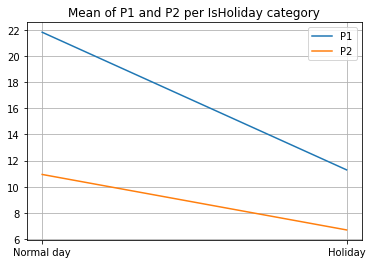

In [22]:
mean_print_plot(df, category='IsHoliday', data_col1='P1', data_col2='P2')
locs, ticks = plt.xticks()
plt.xticks([locs[1], locs[-2]], ['Normal day', 'Holiday'])

P1 data stats: WeekDay
0    21.014056
1    21.728988
2    22.097306
3    19.003289
4    22.818081
5    24.521938
6    20.779478
Name: P1, dtype: float64
------------------------------------------------
P2 data stats: WeekDay
0    10.831553
1    10.854371
2    10.756217
3     9.595621
4    11.364189
5    12.019899
6    10.807247
Name: P2, dtype: float64


([<matplotlib.axis.XTick at 0x2234e082340>,
 [Text(-1.0, 0, ''),
  Text(0.0, 0, 'Mon'),
  Text(1.0, 0, 'Tue'),
  Text(2.0, 0, 'Wed'),
  Text(3.0, 0, 'Thu'),
  Text(4.0, 0, 'Fri'),
  Text(5.0, 0, 'Sat'),
  Text(6.0, 0, 'Sun'),
  Text(7.0, 0, '')])

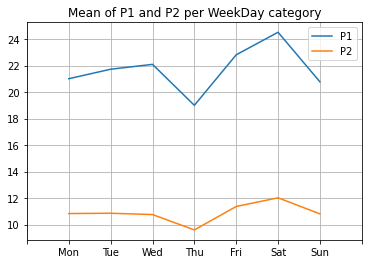

In [23]:
mean_print_plot(df, category='WeekDay', data_col1='P1', data_col2='P2')
locs, ticks = plt.xticks()
plt.xticks(locs, ['', 'Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', ''])

P1 data stats: Season
1    14.023063
2    11.637685
3    24.443991
4    29.279461
Name: P1, dtype: float64
------------------------------------------------
P2 data stats: Season
1     7.370824
2     7.707919
3    11.423877
4    12.849945
Name: P2, dtype: float64


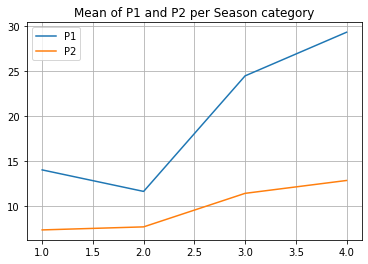

In [24]:
df_blah = df.loc[df['PartDay']==6]
mean_print_plot(df_blah, category='Season', data_col1='P1', data_col2 = 'P2')

P1 data stats: PartDay
1    26.283621
2    17.715138
3    15.988206
4    24.590820
5    23.613574
6    19.668615
Name: P1, dtype: float64
------------------------------------------------
P2 data stats: PartDay
1    12.828904
2     9.623795
3     8.638217
4    12.061610
5    11.576594
6     9.786040
Name: P2, dtype: float64


([<matplotlib.axis.XTick at 0x2234e0d9190>,
 [Text(0.0, 0, ' '),
  Text(1.0, 0, 'Early Morning'),
  Text(2.0, 0, 'Morning'),
  Text(3.0, 0, 'Noon'),
  Text(4.0, 0, 'Afternoon'),
  Text(5.0, 0, 'Evening'),
  Text(6.0, 0, 'Night'),
  Text(7.0, 0, '')])

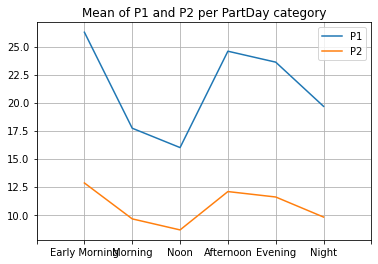

In [25]:
mean_print_plot(df, category='PartDay', data_col1='P1', data_col2='P2')
locs, ticks = plt.xticks()
plt.xticks(locs, [' ','Early Morning', 'Morning', 'Noon', 'Afternoon', 'Evening', 'Night', ''])

P1 data stats: Season
1    13.790710
2    10.960895
3    30.822060
4    33.120027
Name: P1, dtype: float64
------------------------------------------------
P2 data stats: Season
1     7.414766
2     7.603711
3    14.641096
4    14.769914
Name: P2, dtype: float64


([<matplotlib.axis.XTick at 0x2234e0f5eb0>,
 [Text(1.0, 0, 'Spring'),
  Text(2.0, 0, 'Summer'),
  Text(3.0, 0, 'Autumn'),
  Text(4.0, 0, 'Winter')])

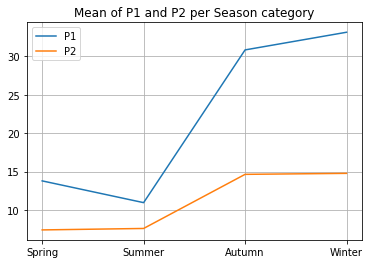

In [26]:
mean_print_plot(df, category='Season', data_col1='P1', data_col2='P2')
locs, ticks = plt.xticks()
plt.xticks(locs[1:-1:2], ['Spring', 'Summer', 'Autumn', 'Winter'])

### As we see there are correlations between the season, week day, time of day and holidays and the air quality. 
##### I will now check with a seaborn correlation plot

<AxesSubplot:>

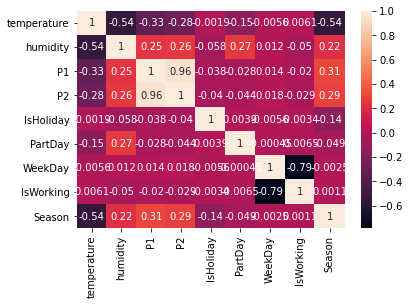

In [27]:
sns.heatmap(df.corr(), annot=True)

Strangly enough there seems to be a correlation also between the humidity and the air quality, but not that much with temperature.

### Regression
##### I think that this problem may be best generalized with a random forest model. First I will start with a regressor, then I will use a classifier

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [29]:
X = df[['temperature', 'humidity', 'IsHoliday', 'WeekDay', 'Season']]
y = df['P1']
today = [12, 47, 0, 1, 1]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [31]:
sc_regr = StandardScaler()
X_train = sc_regr.fit_transform(X_train)
X_test = sc_regr.transform(X_test)


In [32]:
today = sc_regr.transform([today])

In [33]:
regr = RandomForestRegressor()
regr_svm = SVR()

In [34]:
regr.fit(X_train, y_train)
regr_svm.fit(X_train, y_train)

SVR()

In [35]:
regr.predict(today)

array([17.3627])

In [36]:
regr_svm.predict(today)

array([11.86382638])

In [37]:
y_pred_svm = regr_svm.predict(X_test)

Regression ANN:

In [38]:
import tensorflow as tf

In [39]:
ann_regr = tf.keras.models.Sequential()

In [40]:
ann_regr.add(tf.keras.layers.Dense(units = 5, activation='relu'))
ann_regr.add(tf.keras.layers.Dense(units = 8, activation='relu'))
ann_regr.add(tf.keras.layers.Dense(units=1))

In [41]:
ann_regr.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
ann_regr.fit(X, y, batch_size=64, epochs=100)

Epoch 1/100
1618/1618 [==============================] - 1s 453us/step - loss: 777.8249
Epoch 2/100
1618/1618 [==============================] - 1s 462us/step - loss: 727.9202
Epoch 3/100
1618/1618 [==============================] - 1s 482us/step - loss: 690.1241
Epoch 4/100
1618/1618 [==============================] - 1s 429us/step - loss: 696.0460
Epoch 5/100
1618/1618 [==============================] - 1s 433us/step - loss: 704.2265
Epoch 6/100
1618/1618 [==============================] - 1s 436us/step - loss: 729.4254
Epoch 7/100
1618/1618 [==============================] - 1s 433us/step - loss: 703.8093
Epoch 8/100
1618/1618 [==============================] - 1s 433us/step - loss: 687.1679
Epoch 9/100
1618/1618 [==============================] - 1s 430us/step - loss: 718.8100
Epoch 10/100
1618/1618 [==============================] - 1s 431us/step - loss: 675.8840
Epoch 11/100
1618/1618 [==============================] - 1s 434us/step - loss: 671.3752
Epoch 12/100
1618/1618 [======

1618/1618 [==============================] - 1s 476us/step - loss: 691.2195
Epoch 94/100
1618/1618 [==============================] - 1s 481us/step - loss: 681.9622
Epoch 95/100
1618/1618 [==============================] - 1s 457us/step - loss: 696.4977
Epoch 96/100
1618/1618 [==============================] - 1s 459us/step - loss: 676.3839
Epoch 97/100
1618/1618 [==============================] - 1s 466us/step - loss: 666.1094
Epoch 98/100
1618/1618 [==============================] - 1s 459us/step - loss: 654.3423
Epoch 99/100
1618/1618 [==============================] - 1s 458us/step - loss: 676.7068
Epoch 100/100
1618/1618 [==============================] - 1s 465us/step - loss: 651.4336


In [43]:
y_pred = ann_regr.predict(X_test)

In [44]:
print(y_test)

21299      5.23
46765     31.80
61847      9.80
22409     54.80
83732     14.07
          ...  
83489      5.03
101649     4.50
75516     31.23
101481     7.50
32904      3.30
Name: P1, Length: 31059, dtype: float64


In [45]:
ann_regr.predict(today)

array([[10.207802]], dtype=float32)

Later training XGBoost

In [46]:
df['HighP1'] = df['P1'].apply(is_p1_high)

### Now I will run a classification RF model

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
y = df['HighP1']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
today = [1, 100, 0, 6, 1]

In [50]:
classifier = RandomForestClassifier()

In [51]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
y_pred = classifier.predict(X_test)

In [53]:
print(accuracy_score(y_test, y_pred))

0.8872146559773335


In [54]:
print(confusion_matrix(y_test,y_pred))

[[24694  1519]
 [ 1984  2862]]


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     26213
           1       0.65      0.59      0.62      4846

    accuracy                           0.89     31059
   macro avg       0.79      0.77      0.78     31059
weighted avg       0.88      0.89      0.88     31059



In [56]:
classifier.predict_proba([today])
regr.predict([today])

array([23.9643])

In [57]:
regr.feature_importances_

array([0.5678878 , 0.2270516 , 0.00064802, 0.14033457, 0.06407801])

In [58]:
classifier.feature_importances_

array([0.56852997, 0.23193755, 0.00104011, 0.07856513, 0.11992724])

Results are not great - this may be due to overfitting of the clean air data as we have roughly 5 times more data for that case

In [59]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [60]:
sc = StandardScaler()

In [61]:
classifier_svc = SVC()

In [62]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
today = sc.transform([today])

In [63]:
classifier_svc.fit(X_train, y_train)

SVC()

In [64]:
y_pred_svc = classifier_svc.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     26213
           1       0.59      0.24      0.34      4846

    accuracy                           0.86     31059
   macro avg       0.73      0.60      0.63     31059
weighted avg       0.83      0.86      0.83     31059



In [66]:
classifier_svc.predict(today)

array([0], dtype=int64)

Now I will try with ANN regression/classification

In [67]:
import tensorflow as tf

In [68]:
ann = tf.keras.models.Sequential()

In [69]:
ann.add(tf.keras.layers.Dense(units = 8, activation='relu'))
ann.add(tf.keras.layers.Dense(units = 8, activation='relu'))

In [70]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [71]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
ann.fit(X_train, y_train, batch_size=64, epochs=100)

Epoch 1/100
1133/1133 [==============================] - 1s 526us/step - loss: 0.4369 - accuracy: 0.7975
Epoch 2/100
1133/1133 [==============================] - 1s 497us/step - loss: 0.3257 - accuracy: 0.8367
Epoch 3/100
1133/1133 [==============================] - 1s 504us/step - loss: 0.3192 - accuracy: 0.8415
Epoch 4/100
1133/1133 [==============================] - 1s 498us/step - loss: 0.3167 - accuracy: 0.8452
Epoch 5/100
1133/1133 [==============================] - 1s 499us/step - loss: 0.3170 - accuracy: 0.8428
Epoch 6/100
1133/1133 [==============================] - 1s 506us/step - loss: 0.3160 - accuracy: 0.8413
Epoch 7/100
1133/1133 [==============================] - 1s 497us/step - loss: 0.3136 - accuracy: 0.8435
Epoch 8/100
1133/1133 [==============================] - 1s 504us/step - loss: 0.3137 - accuracy: 0.8436
Epoch 9/100
1133/1133 [==============================] - 1s 500us/step - loss: 0.3124 - accuracy: 0.8460
Epoch 10/100
1133/1133 [==============================]

Epoch 78/100
1133/1133 [==============================] - 1s 534us/step - loss: 0.2931 - accuracy: 0.8618
Epoch 79/100
1133/1133 [==============================] - 1s 524us/step - loss: 0.2930 - accuracy: 0.8620
Epoch 80/100
1133/1133 [==============================] - 1s 560us/step - loss: 0.2907 - accuracy: 0.8624
Epoch 81/100
1133/1133 [==============================] - 1s 629us/step - loss: 0.2905 - accuracy: 0.8643
Epoch 82/100
1133/1133 [==============================] - 1s 532us/step - loss: 0.2906 - accuracy: 0.8621
Epoch 83/100
1133/1133 [==============================] - 1s 526us/step - loss: 0.2891 - accuracy: 0.8643
Epoch 84/100
1133/1133 [==============================] - 1s 527us/step - loss: 0.2874 - accuracy: 0.8631
Epoch 85/100
1133/1133 [==============================] - 1s 529us/step - loss: 0.2887 - accuracy: 0.8645
Epoch 86/100
1133/1133 [==============================] - 1s 531us/step - loss: 0.2920 - accuracy: 0.8613
Epoch 87/100
1133/1133 [======================

In [73]:
y_pred = ann.predict(X_test)

In [74]:
ann.predict(today)

array([[0.07344437]], dtype=float32)

In [75]:
y_pred = (y_pred > 0.5)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     26213
           1       0.60      0.44      0.51      4846

    accuracy                           0.87     31059
   macro avg       0.75      0.69      0.72     31059
weighted avg       0.85      0.87      0.86     31059



In [77]:
data = weathercom.getCityWeatherDetails(city='Sofia',queryType="ten-days-data")
df = pd.read_json(data)
weather = pd.DataFrame()
date = pd.DataFrame()

In [78]:
weather['Temperature'] = df['vt1dailyForecast']['day']['temperature']
weather['Humidity'] = df['vt1dailyForecast']['day']['humidityPct']

In [79]:
date['Date'] = pd.to_datetime(df['vt1dailyForecast']['validDate'])

In [80]:
weather['IsHoliday'] = date['Date'].apply(is_holiday)
weather['Weekday'] = date['Date'].dt.dayofweek
weather['Season'] = date['Date'].apply(season)

In [81]:
weather = sc_regr.transform(weather)

In [82]:
ann_regr.predict(weather)

array([[ 9.536899 ],
       [ 9.470142 ],
       [10.731634 ],
       [10.163251 ],
       [ 9.602299 ],
       [ 9.25119  ],
       [ 9.090693 ],
       [ 9.579494 ],
       [ 9.484379 ],
       [10.692276 ],
       [10.163251 ],
       [ 9.616421 ],
       [ 9.197155 ],
       [ 9.2212715],
       [ 9.584774 ]], dtype=float32)

Saving the model so it can be reused

In [88]:
regr_svm.predict(weather)

array([10.9926853 ,  9.35739567,  8.79661261,  7.20804322,  5.55358888,
        5.60462497,  5.91590952,  6.45808598,  7.25833107,  8.15680595,
        7.20804322,  5.78379189,  5.63670194,  6.26993954,  6.58208697])

In [83]:
import joblib

In [89]:
joblib.dump(regr_svm, 'svm_regr.bin', compress=True)

['svm_regr.bin']

In [84]:
joblib.dump(sc_regr, 'std_scaler.bin', compress=True)

['std_scaler.bin']

In [85]:
ann_regr.save('ann_regr_weather.h5')